## Predicting Speedup - Classification

We label each data point collected as:-
<ul>
    <li>'Slowdown' (speedup < 1)</li>
    <li>'Minimal' (speedup < 10)</li>
    <li>'Moderate' (speedup < 20)</li>
    <li>'High' (speedup >= 20)</li>
</ul>
Then we train our classifier to predict wheather the application would get a preferable speed up range.

Importing required libraries

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from IPython.display import Image
from matplotlib import cm as cm
from subprocess import call
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import pandas as pd 
import numpy as np

### Data Pre-Processing

Read CSV

In [2]:
np.random.seed(42)
df = pd.read_csv('./data/final_data_sort.csv')
df.head()

,SP/SM,Num SM,Cluster ID,Data (Transfer) Size (in Bytes),Ratio of Global Access,Ratio of FP Instructions,Ratio of Branch Inst,Speedup,Num Blocks,Num Threads,Application Name,PCIe Bandwidth,Class
0,64,80,3,40000,0.11,0.0,0.000,0.004842,1020,1,QuickSort,4.0,Slowdown
1,64,80,3,40000,0.11,0.0,0.000,0.004842,1020,1,QuickSort,4.0,Slowdown
2,64,80,3,4000,0.11,0.0,0.000,0.004900,118,1,QuickSort,4.0,Slowdown
3,64,80,3,4000,0.11,0.0,0.000,0.004900,118,1,QuickSort,4.0,Slowdown
4,64,80,3,100001,0.82,0.0,0.032,0.008255,1563,64,PrimeGen,4.0,Slowdown


In [3]:
df.dtypes

SP/SM                                int64
Num SM                               int64
Cluster ID                           int64
Data (Transfer) Size (in Bytes)      int64
Ratio of Global Access             float64
Ratio of FP Instructions           float64
Ratio of Branch Inst               float64
Speedup                            float64
Num Blocks                           int64
Num Threads                          int64
Application Name                    object
PCIe Bandwidth                     float64
Class                               object
dtype: object

Drop columns that do not add to analysis

In [4]:
#drop columns irrelevant columns
df = df.drop(['Cluster ID'], axis=1)
df = df.drop(['Application Name'], axis=1)
df = df.drop(['Ratio of FP Instructions'], axis=1)
df = df.drop(['Speedup'], axis=1)

Train-test split after feature-test split and standardizing training data

In [5]:
#features-target split
y = df['Class'].values
df = df.drop(['Class'], axis=1)
X = df.values

#standardize
scaler = StandardScaler()
X=scaler.fit_transform(X)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

### Baseline for Classification

In [6]:
#Random Forest Classifier
classifier = DummyClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#evalaute
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='macro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='macro'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='micro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.25
F1 score: 0.29166666666666663
Precision: 0.4166666666666667
Recall: 0.25
F1 score: 0.15277777777777776
Precision: 0.19444444444444442
Recall: 0.16666666666666666
F1 score: 0.25
Precision: 0.25
Recall: 0.25


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


### Random Forest

In [7]:
#Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#evalaute
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='macro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='macro'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='micro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.95
F1 score: 0.9460000000000001
Precision: 0.9538461538461538
Recall: 0.95
F1 score: 0.94
Precision: 0.9807692307692308
Recall: 0.9166666666666666
F1 score: 0.9500000000000001
Precision: 0.95
Recall: 0.95


Confusion Matrix -> We notice that 1 Minimal has been wrongly predicted as slow -> Acceptable

In [8]:
metrics.confusion_matrix(y_test, y_pred, labels=["Slowdown", "Minimal", "Moderate","High"])

array([[12,  0,  0,  0],
       [ 1,  2,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  0,  3]], dtype=int64)

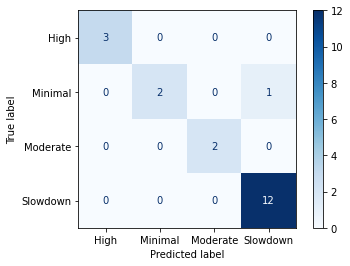

In [9]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

In [10]:
# Export as dot file
estimator = classifier.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(df.keys()),
                class_names = ["Slowdown","Minimal","Moderate","High"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'],shell=True)

1

<img src="rf_tree.png">

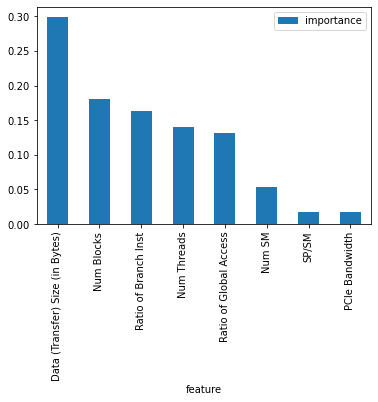

In [11]:
#Important Features
importances = pd.DataFrame({'feature':df.columns,'importance':np.round(classifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar();

### Gradient Boosted Trees

In [12]:
#GBT
classifier = GradientBoostingClassifier(n_estimators=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#evalaute
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='macro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='macro'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='micro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.95
F1 score: 0.9460000000000001
Precision: 0.9538461538461538
Recall: 0.95
F1 score: 0.94
Precision: 0.9807692307692308
Recall: 0.9166666666666666
F1 score: 0.9500000000000001
Precision: 0.95
Recall: 0.95


Confusion Matrix -> Same error as Random Forest

In [13]:
metrics.confusion_matrix(y_test, y_pred, labels=["Slowdown", "Minimal", "Moderate","High"])

array([[12,  0,  0,  0],
       [ 1,  2,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  0,  3]], dtype=int64)

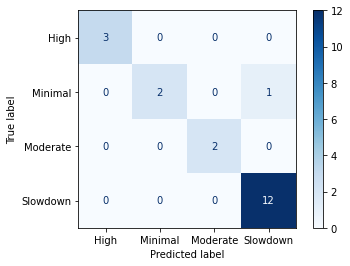

In [14]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

### Multi-Layer Perceptron

In [15]:
#Multi-Layer Perceptron
classifier = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=4500, random_state=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

#evalaute
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='macro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='macro'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='micro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.85
F1 score: 0.8621212121212121
Precision: 0.9
Recall: 0.85
F1 score: 0.8106060606060606
Precision: 0.7916666666666666
Recall: 0.875
F1 score: 0.85
Precision: 0.85
Recall: 0.85


Confusion Matrix -> 2 Slowdown have been missclassifed as Minimal and Moderate & 1 Minimal as Moderate -> Not preferrable

In [16]:
metrics.confusion_matrix(y_test, y_pred, labels=["Slowdown", "Minimal", "Moderate","High"])

array([[10,  1,  1,  0],
       [ 0,  2,  1,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  0,  3]], dtype=int64)

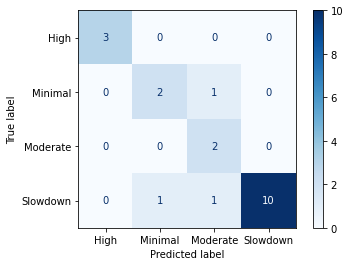

In [17]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

### Support Vector Machine

In [18]:
#Support Vector Machine 
classifier = SVC(kernel='rbf') #try different kernels
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

#evalaute
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='macro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='macro'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='micro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.65
F1 score: 0.6417391304347826
Precision: 0.6633116883116883
Recall: 0.65
F1 score: 0.4173913043478261
Precision: 0.4237012987012987
Recall: 0.45833333333333337
F1 score: 0.65
Precision: 0.65
Recall: 0.65


C:\Users\poorn\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix -> 2 Slowdowns as Minimal and 1 Minimal as High; 1 Moderate as Minimal and 1 as Slowdown -> (not preferrable); 2 High as Minimal (ok)

In [19]:
metrics.confusion_matrix(y_test, y_pred, labels=["Slowdown", "Minimal", "Moderate","High"])

array([[10,  2,  0,  0],
       [ 0,  2,  0,  1],
       [ 1,  1,  0,  0],
       [ 0,  2,  0,  1]], dtype=int64)

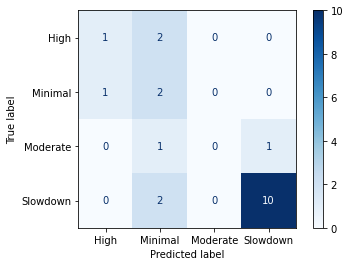

In [20]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

### Logistic Regression

In [21]:
#Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#evalaute
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='macro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='macro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='macro'))

print('F1 score:', metrics.f1_score(y_test, y_pred,average='micro'))
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.7
F1 score: 0.6887142857142857
Precision: 0.7326923076923076
Recall: 0.7
F1 score: 0.4878571428571429
Precision: 0.5865384615384616
Recall: 0.47916666666666663
F1 score: 0.7
Precision: 0.7
Recall: 0.7


Confusion Matrix -> 1 Slowdown as High, 1 Minimal as Moderate and 2 Minimal as High; 1 High as Moderate -> Not at all Preferable -> Worst performance

In [22]:
metrics.confusion_matrix(y_test, y_pred, labels=["Slowdown", "Minimal", "Moderate","High"])

array([[11,  0,  0,  1],
       [ 0,  1,  1,  1],
       [ 2,  0,  0,  0],
       [ 0,  0,  1,  2]], dtype=int64)

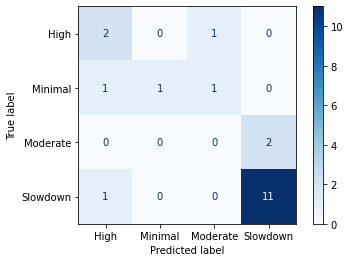

In [23]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)